<a href="https://colab.research.google.com/github/isosceles45/DAV55/blob/master/Time_Series_DAV_55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/AirPassengers.csv")

df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.columns = ['Date','Number of Passengers']

df.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


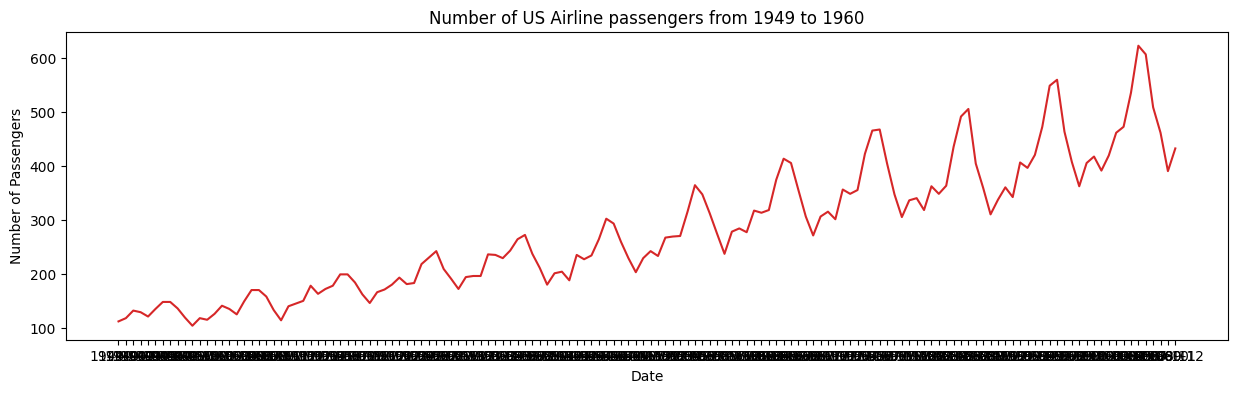

In [4]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

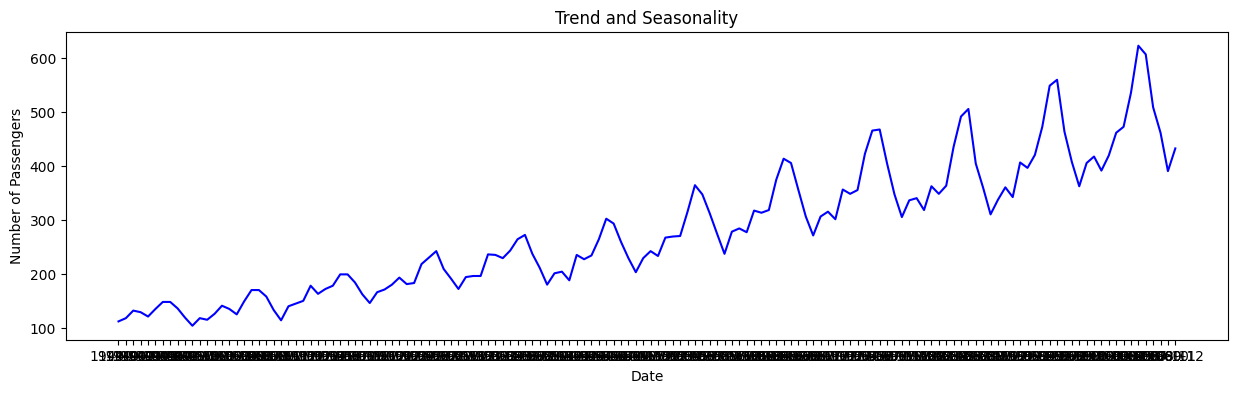

In [5]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Trend and Seasonality')

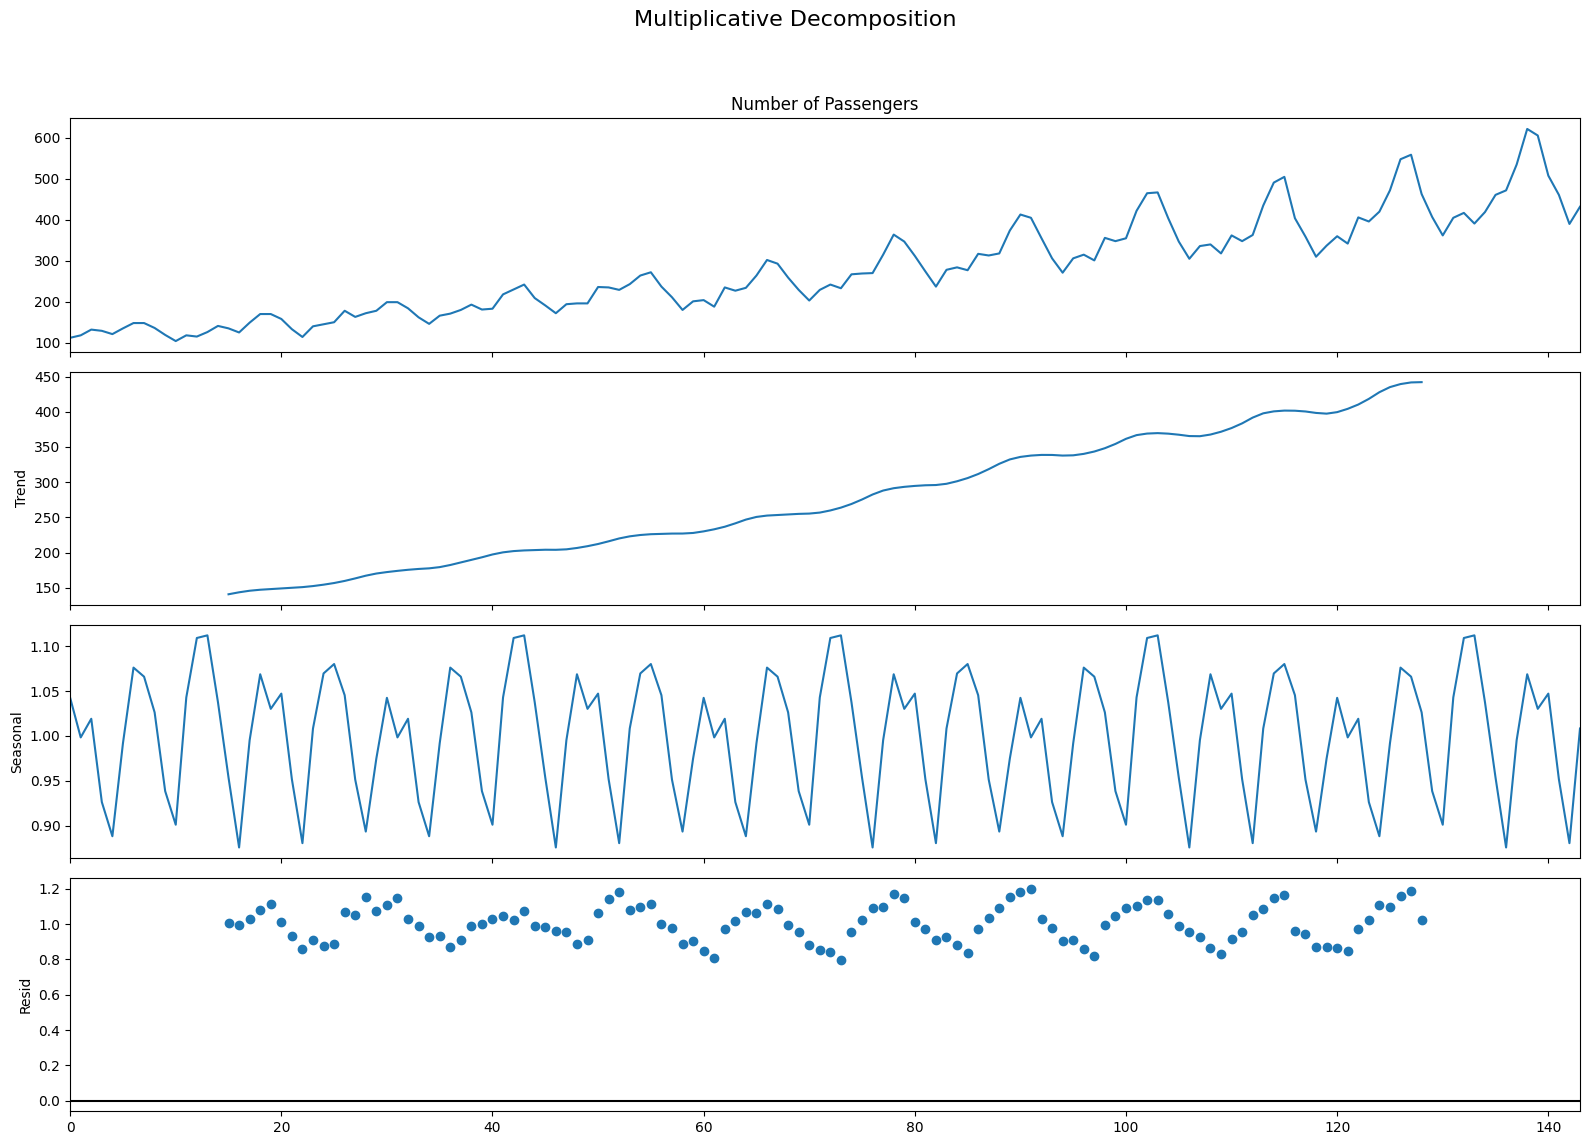

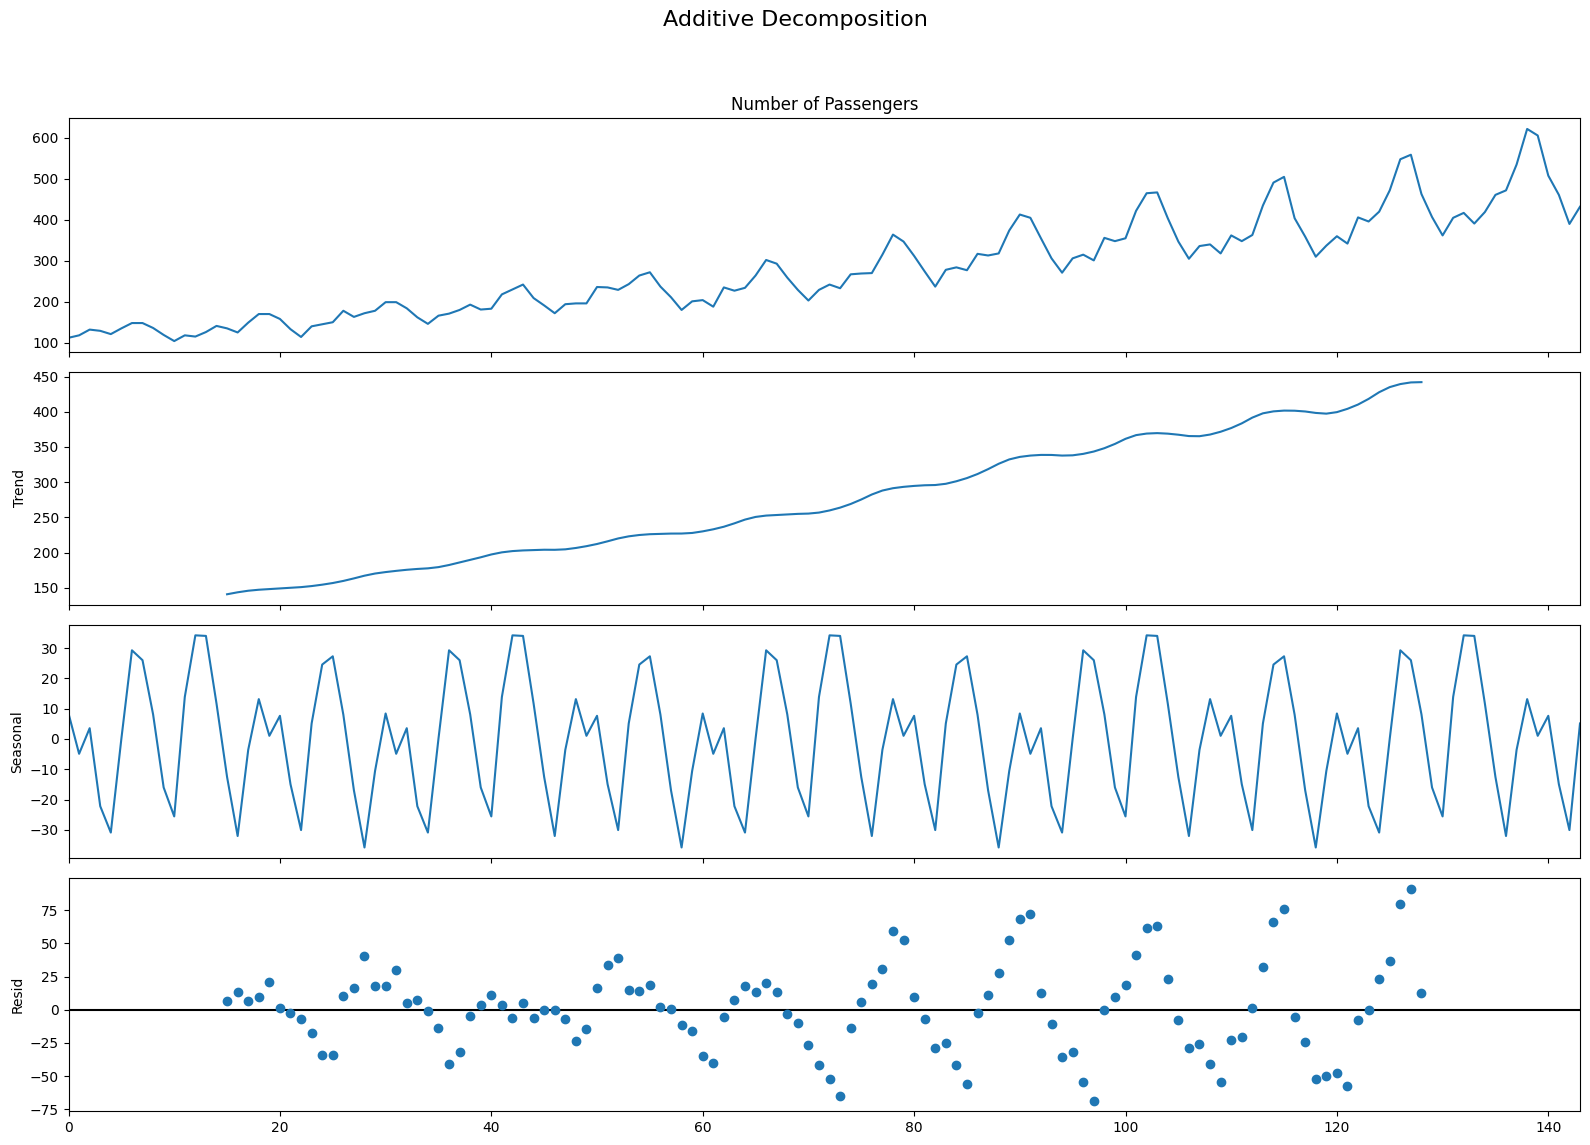

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

<Axes: title={'center': 'Random White Noise'}>

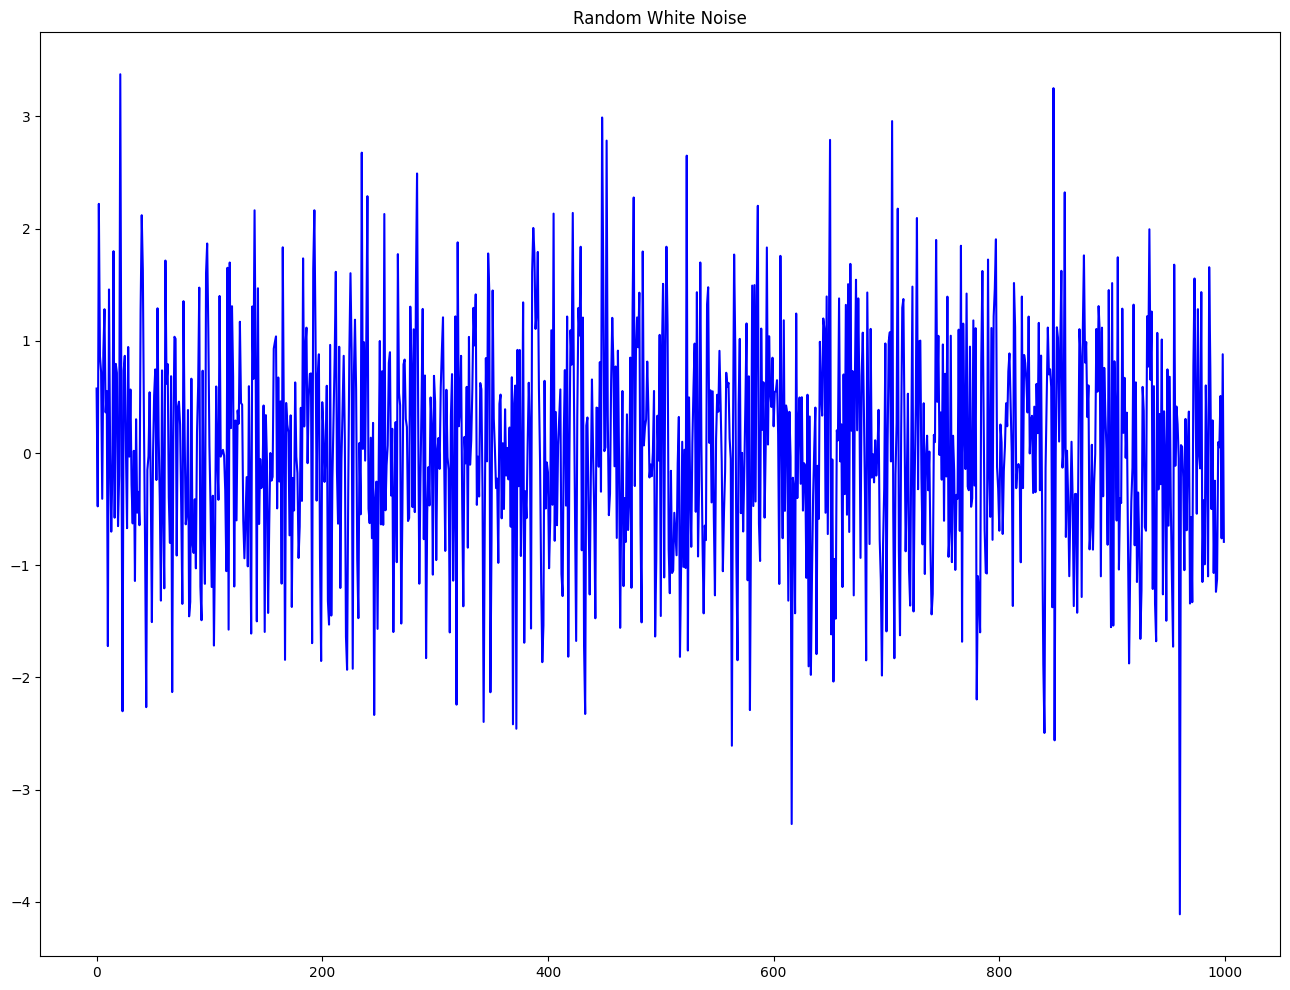

In [7]:
rand_numbers = np.random.randn(1000)
pd.Series(rand_numbers).plot(title='Random White Noise', color='b')

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the least squares fit')

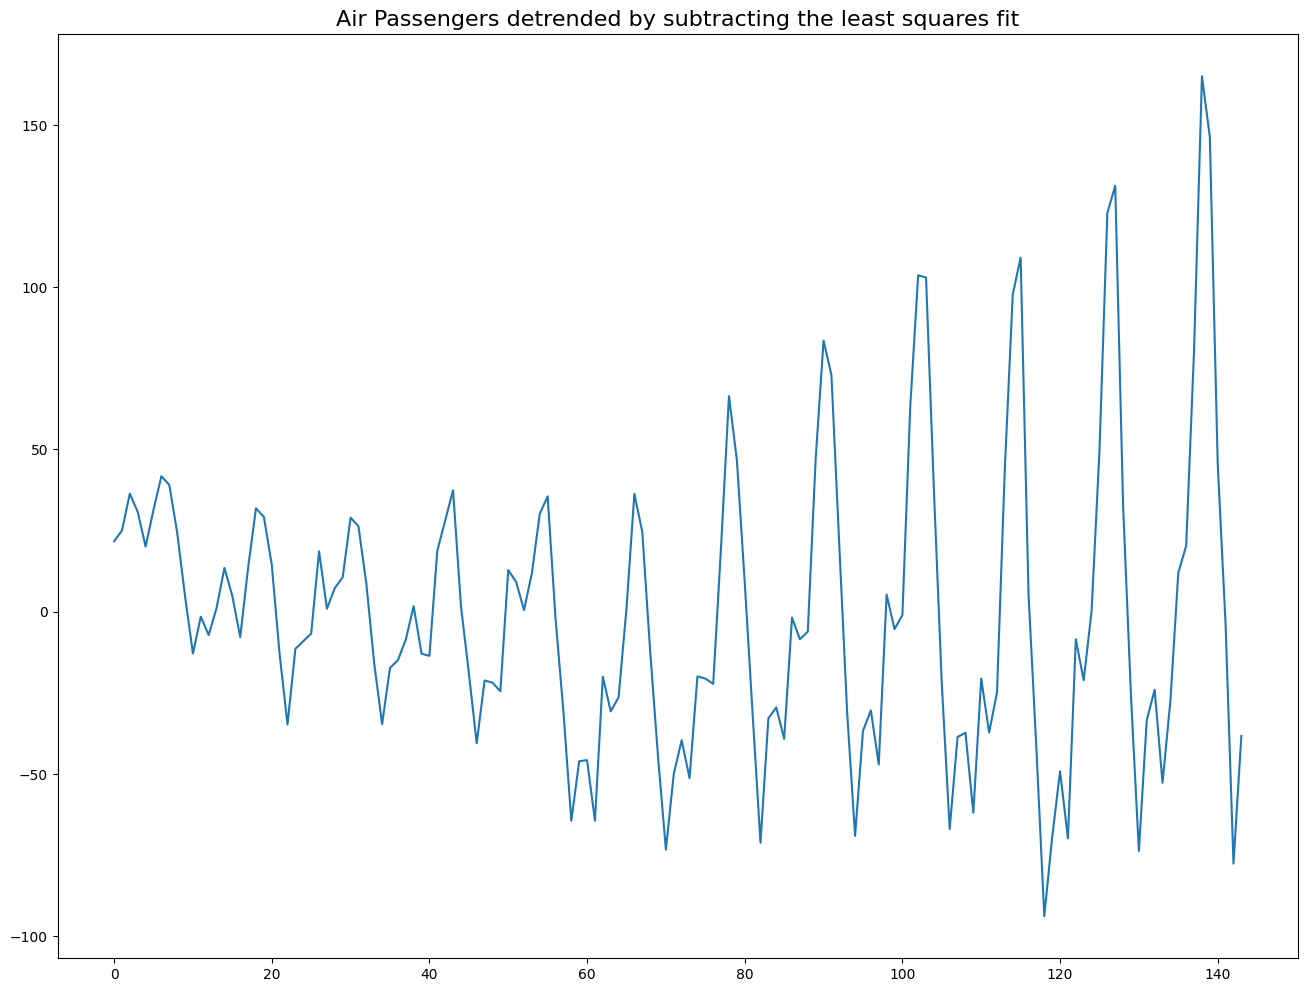

In [8]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(df['Number of Passengers'].values)
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the trend component')

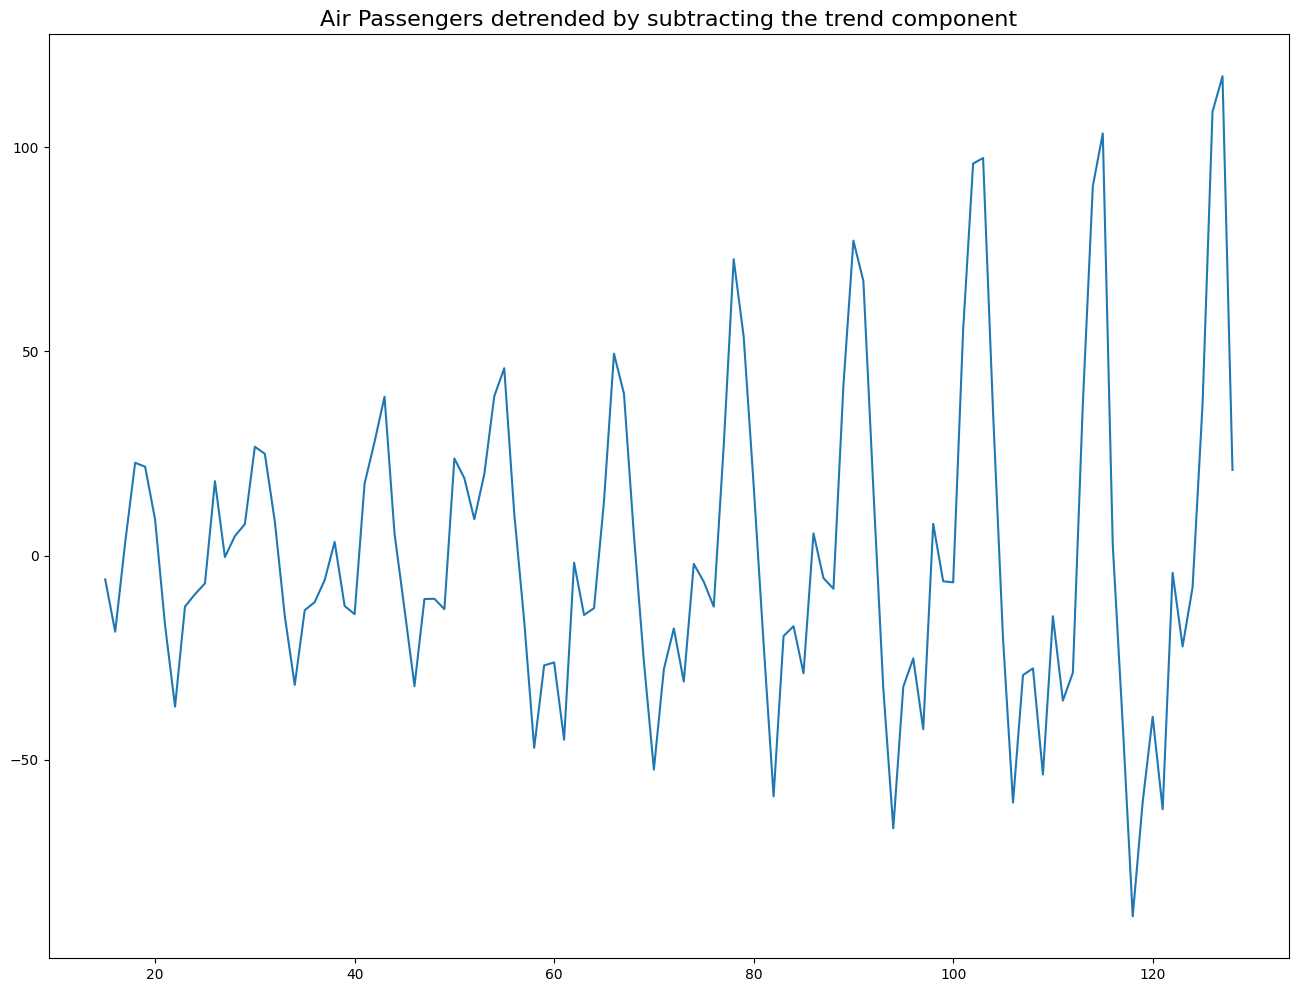

In [9]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)
detrended = df['Number of Passengers'].values - result_mul.trend
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the trend component', fontsize=16)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

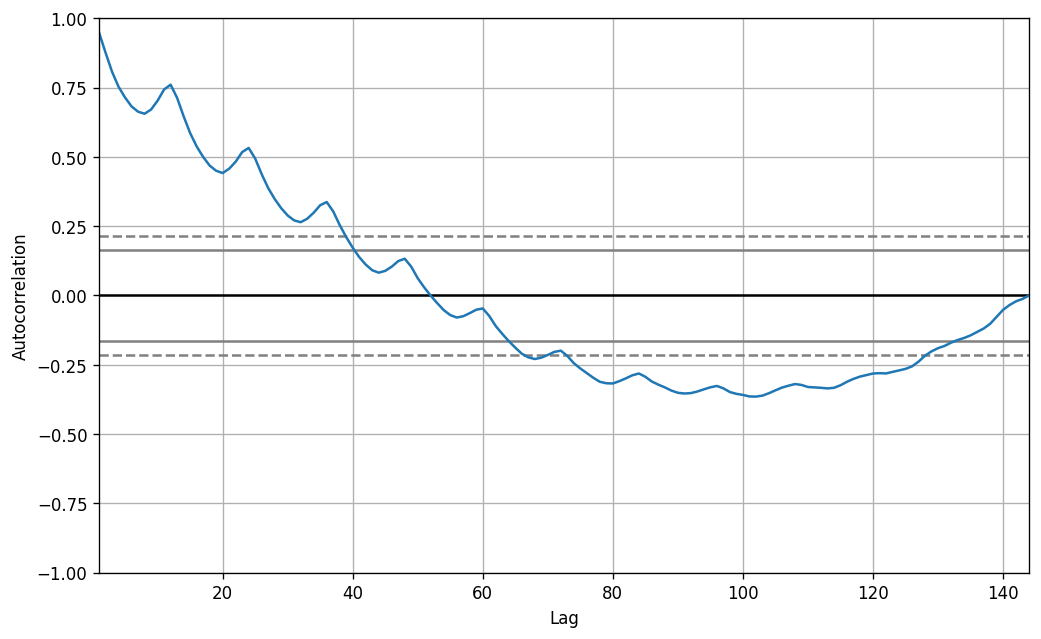

In [10]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['Number of Passengers'].tolist())

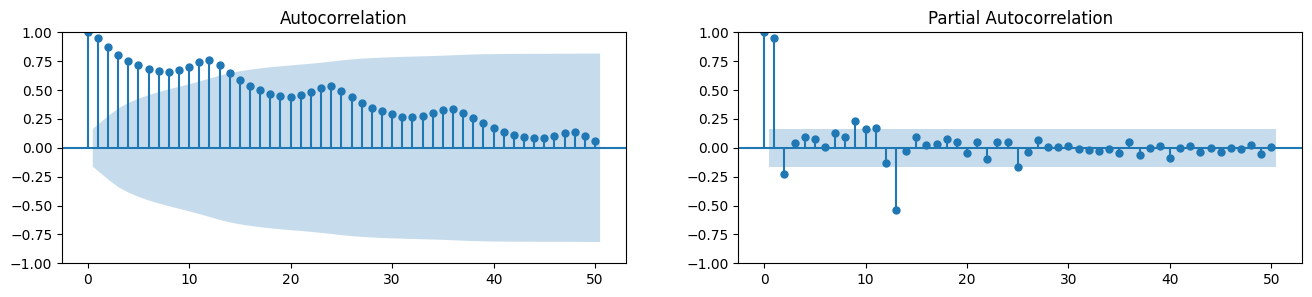

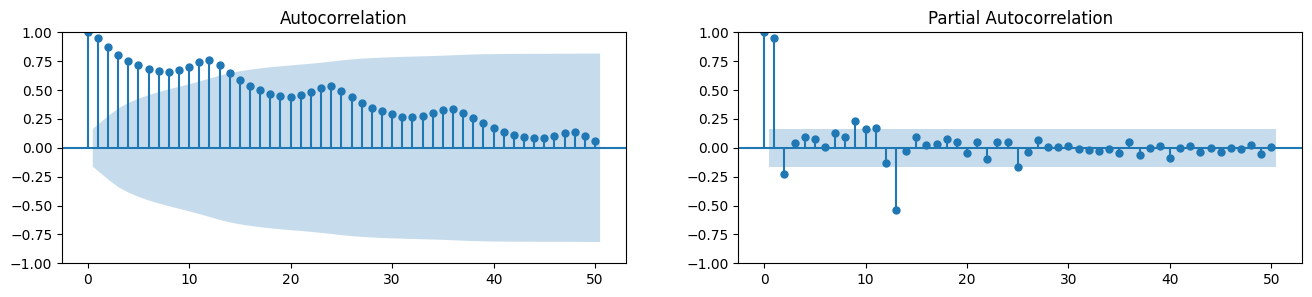

In [11]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Number of Passengers'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Number of Passengers'].tolist(), lags=50, ax=axes[1])

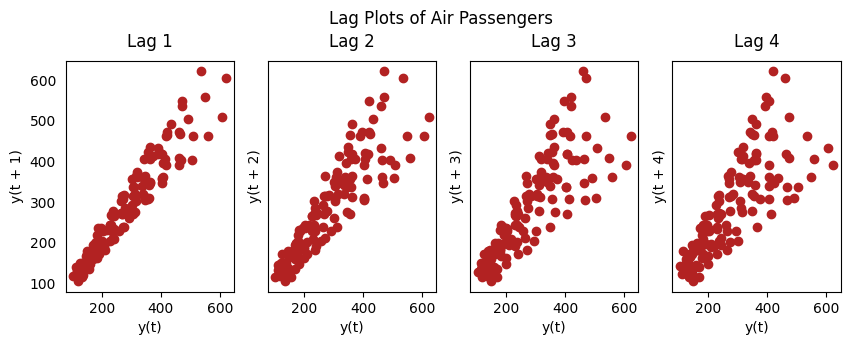

In [12]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Number of Passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)
plt.show()